<a href="https://colab.research.google.com/github/JMMV314/Se-ales-y-Sistemas/blob/main/Parcial1/Parcial1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto b


No se indicó en el ejercicio el numero de bits para el conversor, ni su rango de operación, por lo que arbitrariamente elijo por comodidad visual, y porque fue un ejercicio previo: un conversor A/D de 3 bits y un rango de operación [0,10].

Para la señal dada, al ser una combinación lineal de funciones seno y coseno, se debe verificar su quasi-periodicidad (la cual cumple). Este proceso se adjunta de manera escrita en el PDF incluido en la entrega.

##Para $F_o ^= 5kHz$:

Se importan las librerias a usar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Se definen las funciones con el fin de discretizar y cuantizar:

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y
  pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(yn, vq) : #yn valor a #cuantizar, vq vector de estados
  '''
  Codigo base para aproximar un valor yn a el estado más cercano en la lista de estados vq
  Se ingresa un valor yn y se retorna el valor en el vector vq con el valor más cercano a yn
  '''
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1)) #distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Código para definir periodos y frecuencias de muestreo:

In [ ]:
#Velocidades angulares presentes en la función
w1=(1/5)*np.pi
w2=(2/5)*np.pi
w3=(11/5)*np.pi

#Frecuencia mínima y máxima
fmax=max(w1,w2)/(2*np.pi)
fmin=min(w1,w2)/(2*np.pi)

f=1#Frecuencia de muestreo
T=1/(f) #Periodo de muestreo para 'f'

#Tiempos de referencia y número de muestras
ti=0
tf=(1/fmin)*1 #se graficará 1 ciclo completo para la mayor menor angular

K=int((tf-ti)/T) #Número de muestras
print(K)
## vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)

10


Código para definir vector de cuantización:

In [ ]:
##número de bits y vector de cuantización
nbits = 3
rmin = 0 #valor minimo a cuantizar
rmax = 10 #Valor máximo a cuantizar
ve = np.linspace(rmin,rmax,2**nbits) #Posiciones de cuantización

Declaración de la función a modelar:

In [ ]:
x=13*np.cos(w1*tv)+5*np.sin(w2*tv)#señal discretizada a modelar

xn=my_ceropen(x,rmin,rmax) #Función normalizada
#y=my_ceropen(3*np.cos(w1*tv),rmin,rmax)

Cuantizando el vector:

In [ ]:
for i in range(xn.shape[0]):
   if i==0: #primera muestra
     xq = my_cuantizador(xn[i],ve)
   else:
     xq = np.append(xq,my_cuantizador(xn[i],ve)) #apilar datos cuantizando si i>0

Código para graficación:

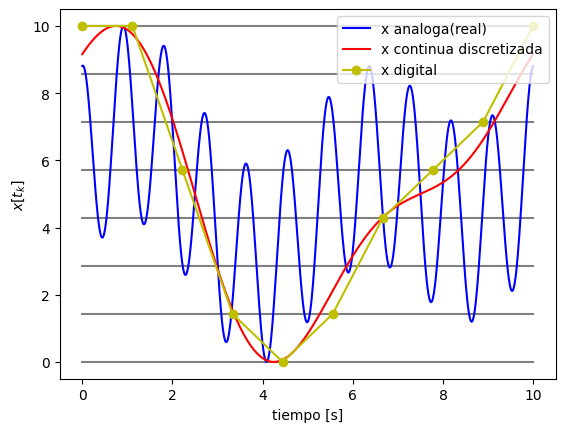

In [ ]:
#estados de cuantización
for v in ve:
  plt.plot([tv[0],tv[-1]],v*np.ones(2),c="grey") #alternativa a la planteada ##¿Más eficiente?


#Graficando función continua
t=np.linspace(start=ti,stop=tf,num=1000)
sa=my_ceropen(3*np.cos(w1*t)+5*np.sin(w2*t)+10*np.cos(w3*t),rmin,rmax) #Función analoga modelar
sd=my_ceropen(13*np.cos(w1*t)+5*np.sin(w2*t),rmin,rmax) #Señal despues de discretizar la función
plt.plot(t,sa,c='b', label='x analoga(real)')
plt.plot(t,sd,c='r', label='x continua discretizada')

##graficar señales
#plt.plot(tv,yn,c='b', label='x discretizada') #cs discretizada
plt.plot(tv,xq,c='y',marker='o',label='x digital') # graficar señal Digital (discreta + cuantizada)

plt.legend(loc='upper right')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex"""
plt.show()

Cómo se observa, la señal digitalizada con $F_o ^= 5kHz$ no es una buena aproximación de la señal *x(t)* (la señal de color azul), partiendo desde el hecho de que no respeta Nyquist.

##Para $F_s ^= 2 F_o$:

Por el teorema de Nyquist, sabemos que se debe cumplir $F_s \geq 2 F_o$ para no perder información relevante. Y dado que en este caso, en el que la frecuencia mayor es $fmax=(11000π/2π) Hz =
5500Hz $, realizando la misma digitalización, pero respetando el teorema de Nyquist, para el caso en el que $F_s = 2 F_o = 11000Hz$, tenemos:


Se importan las librerias a usar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Se definen las funciones con el fin de discretizar y cuantizar:

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y
  pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(yn, vq) : #yn valor a #cuantizar, vq vector de estados
  '''
  Codigo base para aproximar un valor yn a el estado más cercano en la lista de estados vq
  Se ingresa un valor yn y se retorna el valor en el vector vq con el valor más cercano a yn
  '''
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1)) #distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Código para definir periodos y frecuencias de muestreo:

In [ ]:
#Velocidades angulares presentes en la función
w1=(1/11)*np.pi
w2=(2/11)*np.pi
w3=np.pi

#Frecuencia mínima y máxima
fmax=max(w1,w2,w3)/(2*np.pi)
fmin=min(w1,w2,w3)/(2*np.pi)

f=2*fmax #Frecuencia de muestreo
T=1/(f) #Periodo de muestreo para 'f'

#Tiempos de referencia y número de muestras
ti=0
tf=(1/fmin)*1 #se graficará 3 ciclos completos para la mayor menor angular

K=int(((tf-ti)/T)+1) #Número de muestras
## vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)

Código para definir vector de cuantización:

In [ ]:
##número de bits y vector de cuantización
nbits = 3
rmin = 0 #valor minimo a cuantizar
rmax = 10 #Valor máximo a cuantizar
ve = np.linspace(rmin,rmax,2**nbits) #Posiciones de cuantización

Declaración de la función a modelar:

In [ ]:
x=3*np.cos(w1*tv)+5*np.sin(w2*tv)+10*np.cos(w3*tv)#Función a modelar

xn=my_ceropen(x,rmin,rmax) #Función normalizada
#y=my_ceropen(3*np.cos(w1*tv),rmin,rmax)

Cuantizando el vector:

In [ ]:
for i in range(xn.shape[0]):
   if i==0: #primera muestra
     xq = my_cuantizador(xn[i],ve)
   else:
     xq = np.append(xq,my_cuantizador(xn[i],ve)) #apilar datos cuantizando si i>0

Código para graficación:

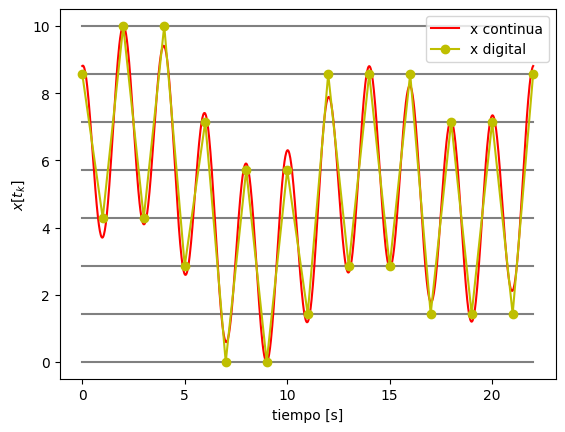

In [ ]:
#estados de cuantización
for v in ve:
  plt.plot([tv[0],tv[-1]],v*np.ones(2),c="grey") #alternativa a la planteada ##¿Más eficiente?


#Graficando función continua
t=np.linspace(start=ti,stop=tf,num=1000)
sa=my_ceropen(3*np.cos(w1*t)+5*np.sin(w2*t)+10*np.cos(w3*t),rmin,rmax) #Función a modelar
plt.plot(t,sa,c='r', label='x continua')


##graficar señales
#plt.plot(tv,yn,c='b', label='x discretizada') #cs discretizada
plt.plot(tv,xq,c='y',marker='o',label='x digital') # graficar señal Digital (discreta + cuantizada)

plt.legend(loc='upper right')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex"""
plt.show()

Ahora se distingue bien la señal digitalizada sin perdidas de información y sin aliasing, debido a que se maneja una frecuencia de muestreo adecuada.

#Punto C

Se importan las librerias a usar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Se definen las funciones con el fin de discretizar y cuantizar:

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y
  pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

def my_cuantizador(yn, vq) : #yn valor a #cuantizar, vq vector de estados
  '''
  Codigo base para aproximar un valor yn a el estado más cercano en la lista de estados vq
  Se ingresa un valor yn y se retorna el valor en el vector vq con el valor más cercano a yn
  '''
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1)) #distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Código para definir periodos y frecuencias de muestreo:

In [ ]:
#Velocidades angulares presentes en la función
w1=1/3
w2=1/4

#Frecuencia y periodo mínimos y máximos
wmax=max(w1,w2)
wmin=min(w1,w2)
Tmax=(2*np.pi)/wmin #se toma wmin porque Tmax será inversamente proporcional
Tmin=(2*np.pi)/wmax #se toma wmax porque Tmax será inversamente proporcional

#Se calcula el periodo común
Tc=np.lcm(int(Tmin/np.pi),int(Tmax/np.pi))*np.pi #Periodo común para 'f', se toma /pi ya que np.lcm no acepta flotantes


T=Tmin/(2*1)#Periodo de muestreo, será 2 veces la frecuencia mayor (equivalente a la mitad del periodo menor)

#Tiempos de referencia y número de muestras
ti=0
tf=3*Tc #se graficará 1 ciclo completo para la señal quasiperiodica

K=int(((tf-ti)/T)+1) #Número de muestras
#print(K)

## vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)

Código para definir vector de cuantización:

In [ ]:
##número de bits y vector de cuantización
nbits = 4
rmin = 0.004 #valor minimo a cuantizar
rmax = 0.020 #Valor máximo a cuantizar
ve = np.linspace(rmin,rmax,2**nbits) #Posiciones de cuantización

Declaración de respuesta al escalón y nueva señal de entrada:

In [ ]:
he=[2,4,1,5,0,10] #Respuesta al escalón
x=20*(np.cos(tv*w1)+np.cos(tv*w2)) #Señal de entrada

xn=my_ceropen(x,rmin,rmax) #Señal normalizada

Cuantizando el vector:

In [ ]:
for i in range(xn.shape[0]):
   if i==0: #primera muestra
     xq = my_cuantizador(xn[i],ve)
   else:
     xq = np.append(xq,my_cuantizador(xn[i],ve)) #apilar datos cuantizando si i>0

Se encuentra la respuesta al impulso con el fin de hacer la convolución a la nueva señal por medio de:
\begin{equation}
h(t) = \frac{d h_\epsilon(t)}{dt}
\end{equation}
que para el caso discreto, se obtiene con la función *np.diff()*


In [ ]:
h=np.diff(he)

Una vez obtenida la respuesta al impulso, se realiza la convolución:

In [ ]:
y=np.convolve(h,xq,mode="same")
print(np.shape(y))

(25,)


Código para graficación de la señal de entrada:

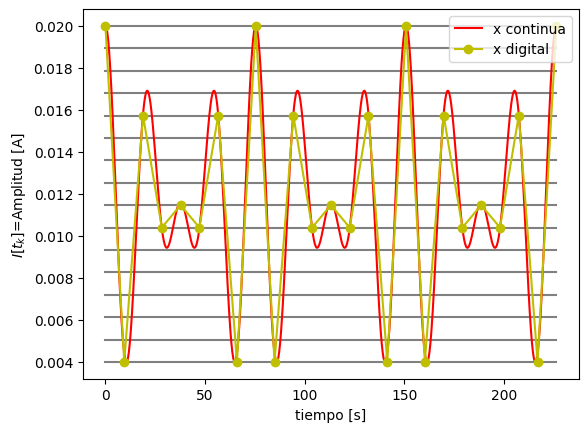

In [ ]:
#estados de cuantización
for v in ve:
  #plt.plot(tv,v*np.ones(len(tv)))
  plt.plot([tv[0],tv[-1]],v*np.ones(2),c="grey") #alternativa a la planteada ##¿Más eficiente?


#Graficando función continua
t=np.linspace(start=ti,stop=tf,num=1000)
p=20*(np.cos(t*w1)+np.cos(t*w2)) #Función a modelar
pn=my_ceropen(p,rmin,rmax)
plt.plot(t,pn,c='r', label='x continua')


##graficar señales
#plt.plot(tv,yn,c='b', label='x discretizada') #cs discretizada
plt.plot(tv,xq,c='y',marker='o',label='x digital') # graficar señal Digital (discreta + cuantizada)

plt.legend(loc='upper right')
#plt.grid()
plt.xlabel('tiempo [s]')
plt.ylabel('$I[t_k]$=Amplitud [A] ') # $ $ ecuación latex"""
plt.show()

Graficando la salida para la señal *x(t)*:

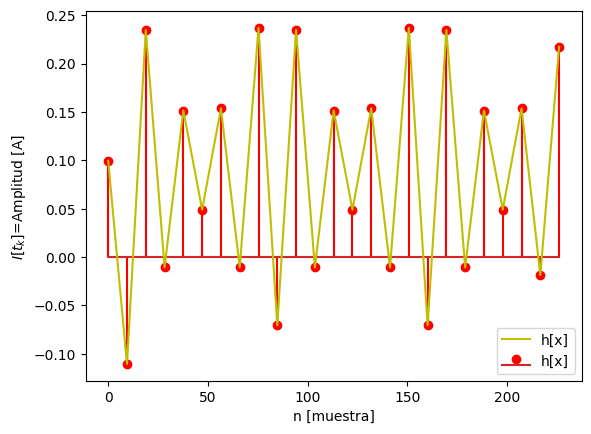

In [ ]:
plt.stem(tv,y,'r',label='h[x]')
plt.plot(tv,y,'y',label='h[x]')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('$I[t_k]$=Amplitud [A] ')
plt.show()